In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sys
# define the path where my modules are saved
module_path = 'home/m/m300909/clear sky feedback/'
# add this path tho the system path using the `sys` module
if not module_path in sys.path: sys.path.append(module_path)
# load them as they were regular python packages.
# (the file is called home/m/m300909/py_data_handling.py)
import cir_func as fun

# Slow rotations < 1/2

## Control scenario

In [5]:
path = '/work/mh0066/m300909/mpiesm-landveg/mpiesm-landveg-3D/experiments/'
sst = ''
ensemble = f'fixed_SST{sst}/'
setup = f'aquaplanet_Qobs_{sst}rotation_'
experiment = ['003125x','00625x', '0125x']
#experiment = ['003125x','00625x', '0125x', '025x','05x', '1x', '2x', '4x' ,'8x']
output_dir = '/newdata/'
model = '_echam6'
file_type = ['_mastrfu','_BOT']
time = '_1976_2015'
suffix = '.nc'

file_name = [
    f"{setup}{exp}{model}{file_type[0]}{time}{suffix}" for exp in experiment
]

In [6]:
ctrl = {}

rotation = ['1/32', '1/16', '1/8']
#rotation = ['1/32', '1/16', '1/8', '1/4','1/2', '1', '2', '4', '8']

for i, rot in enumerate(rotation):
    ctrl[rot] = xr.open_dataset(
        path + ensemble + setup + experiment[i] + output_dir + file_name[i],
        decode_times='true'
    )

## Warming scenario

### 1K

In [7]:
sst = '_1K'
ensemble = f'fixed_SST{sst}/'
setup = f'aquaplanet_Qobs{sst}_rotation_'

file_name = [
    f"{setup}{exp}{model}{file_type[0]}{time}{suffix}" for exp in experiment
]

warm_1K = {}

for i, rot in enumerate(rotation):
    warm_1K[rot] = xr.open_dataset(
        path + ensemble + setup + experiment[i] + output_dir + file_name[i],
        decode_times='true'
    )

### 2K

In [8]:
sst = '_2K'
ensemble = f'fixed_SST{sst}/'
setup = f'aquaplanet_Qobs{sst}_rotation_'

file_name = [
    f"{setup}{exp}{model}{file_type[0]}{time}{suffix}" for exp in experiment
]

warm_2K = {}

for i, rot in enumerate(rotation):
    warm_2K[rot] = xr.open_dataset(
        path + ensemble + setup + experiment[i] + output_dir + file_name[i],
        decode_times='true'
    )

### 3K

In [9]:
sst = '_3K'
ensemble = f'fixed_SST{sst}/'
setup = f'aquaplanet_Qobs{sst}_rotation_'

file_name = [
    f"{setup}{exp}{model}{file_type[0]}{time}{suffix}" for exp in experiment
]

warm_3K = {}

for i, rot in enumerate(rotation):
    warm_3K[rot] = xr.open_dataset(
        path + ensemble + setup + experiment[i] + output_dir + file_name[i],
        decode_times='true'
    )

### 4K

In [10]:
sst = '_4K'
ensemble = f'fixed_SST{sst}/'
setup = f'aquaplanet_Qobs{sst}_rotation_'

file_name = [
    f"{setup}{exp}{model}{file_type[0]}{time}{suffix}" for exp in experiment
]

warm_4K = {}

for i, rot in enumerate(rotation):
    warm_4K[rot] = xr.open_dataset(
        path + ensemble + setup + experiment[i] + output_dir + file_name[i],
        decode_times='true'
    )

In [11]:
data_MASTRFU = {
    'ctrl': ctrl, 
    '1K': warm_1K,
    '2K': warm_2K,
    '3K': warm_3K,
    '4K': warm_4K
}

## Congestus and Deep strength

In [12]:
def dict_to_xarray(data, var, iterate_dim=('rotation', []), time_slice=None):

    import xarray as xr

    """
    Convert a dictionary of data into an xarray DataArray with a specified dimension.

    Parameters:
    - data: dict
        Dictionary containing data arrays.
    - iterate_dim: tuple
        A tuple where the first element is the dimension name (e.g., 'rotation')
        and the second element is a list of values for this dimension.
    - var: str
        Variable name to select from each data array.
    - time_slice: slice, optional
        Time slice to select from each data array.

    Returns:
    - xarray.DataArray
        Concatenated DataArray with the specified dimension.
    """
    dim_name, dim_values = iterate_dim
    data_ls = []
    
    for key, item in data.items():
        data_ls.append(item[var].sel(time=time_slice))

    # Convert the list of data arrays into an xarray DataArray
    data_da = xr.concat(data_ls, dim=dim_name)
    data_da[dim_name] = dim_values
    return data_da

In [13]:
cm = plt.cm.OrRd(np.linspace(0, 1, 7))
time_slice = slice(19860131.996528,20151231.996528)
color_map = {'ctrl': 'grey'}

congestus = {}
deep = {}


# Iterate over the data, skipping the 'ctrl' key
for i, (key, data) in enumerate(data_MASTRFU.items()):

    # Convert data to xarray
    mastrfu = dict_to_xarray(data, 'mastrfu', ('rotation', rotation), time_slice)

    congestus_mastrfu, deep_mastrfu = fun.shallow_deep_mastrfu(mastrfu)

    color = color_map.get(key, cm[i+1])

    # Populate the dictionaries
    congestus[key] = {'mastrfu': congestus_mastrfu, 'color': color}
    deep[key] = {'mastrfu': deep_mastrfu, 'color': color}  

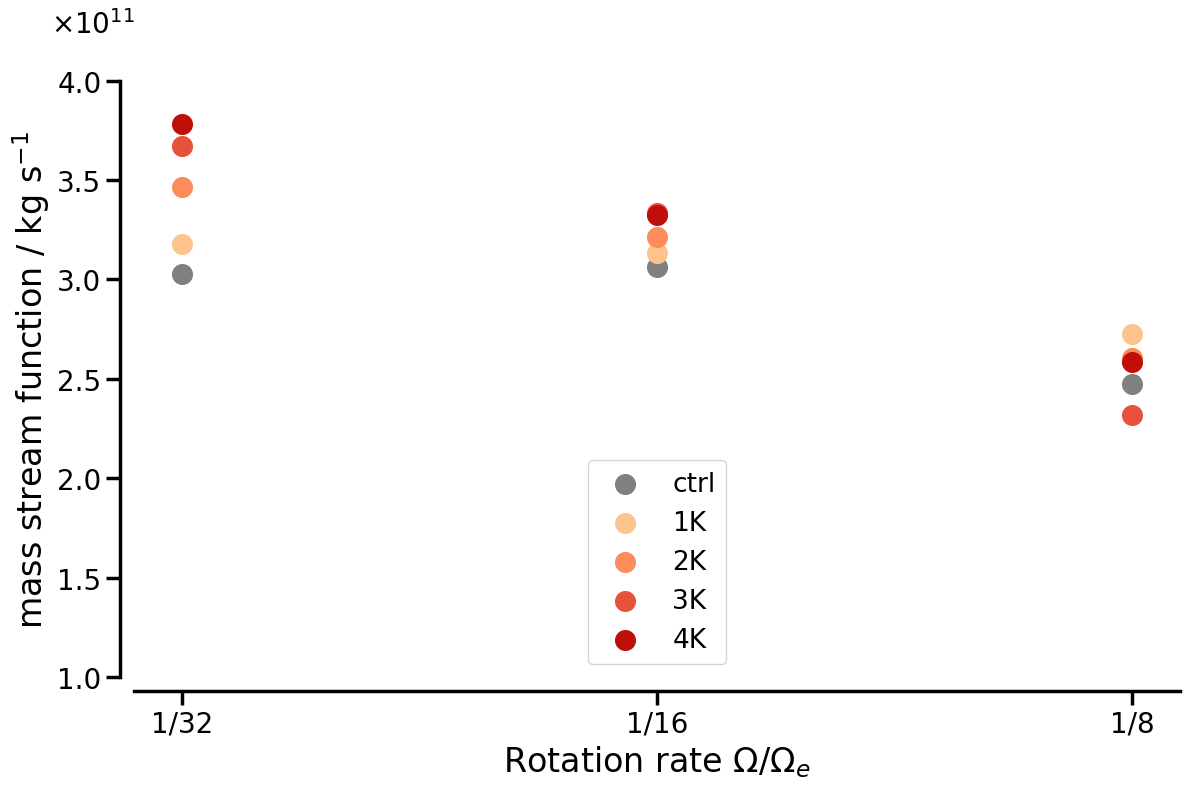

In [28]:
ylabel = 'mass stream function / kg s$^{-1}$'
y_lim = [1e11, 4e11]

fig,ax = plt.subplots(figsize=(12,8))
ax.spines[['right', 'top']].set_visible(False)
ax.spines['left'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines.left.set_position(('outward', 10))
ax.spines.bottom.set_position(('outward', 10))
    
ticks = ['1/32','1/16','1/8']#,'1/4']
x = np.arange(0, len(ticks))

for key, var in congestus.items():
    ax.scatter(x, congestus[key]['mastrfu'], color = congestus[key]['color'], label = key, 
            marker = 'o', s = 200)

ax.xaxis.set_tick_params(which='major', labelsize=20, width=2.5, length=10)
ax.yaxis.set_tick_params(which='major', labelsize=20, width=2.5, length=10)
ax.xaxis.set_ticks(x)
ax.set_xticklabels([x for x in ticks])
ax.set_ylim(y_lim[0],y_lim[1])

ax.yaxis.get_offset_text().set_visible(False)  # Hide the default offset text

# Manually add the custom offset text
ax.annotate(r'$\times 10^{11}$', xy=(0, 1), xytext=(-60, 30),
            xycoords='axes fraction', textcoords='offset points',
            fontsize=20, ha='left', va='bottom')


plt.xlabel('Rotation rate '+ r'$\Omega/\Omega_{e}$', size=24)
plt.ylabel(ylabel, size=24)
plt.legend(fontsize=19, loc = 'lower center')
#plt.axhline(y=0, color='k', linewidth=1, linestyle = 'dotted')

plt.tight_layout()
plt.savefig('Figures/mastrfu_changes.pdf')

In [13]:
mastrfu_mean = mastrfu.mean(dim=['time','lon'])

In [21]:
mastrfu_mean.sel(plev=slice(100000,50000)).max(dim=['plev','lat'])

<xarray.DataArray 'mastrfu' (rotation: 4)>
array([6.5434504e+11, 5.9476253e+11, 5.0046717e+11, 3.4751345e+11],
      dtype=float32)
Coordinates:
  * rotation  (rotation) <U4 '1/32' '1/16' '1/8' '1/4'

# Freezing level

## Control scenario

In [14]:
path = '/work/mh0066/m300909/mpiesm-landveg/mpiesm-landveg-3D/experiments/'
sst = ''
ensemble = f'fixed_SST{sst}/'
setup = f'aquaplanet_Qobs_{sst}rotation_'
experiment = ['003125x', '00625x', '0125x', '025x']
output_dir = '/newdata/'
model = '_echam6'
file_type = '_ATM'
time = '_1976_2015'
suffix = '.nc'

file_name = [
    f"{setup}{exp}{model}{file_type}{time}{suffix}" for exp in experiment
]

In [15]:
ctrl = {}

rotation = ['1/32', '1/16', '1/8', '1/4']

for i, rot in enumerate(rotation):
    ctrl[rot] = xr.open_dataset(
        path + ensemble + setup + experiment[i] + output_dir + file_name[i],
        decode_times='true'
    )

## Warming scenario

### 1K

In [16]:
sst = '_1K'
ensemble = f'fixed_SST{sst}/'
setup = f'aquaplanet_Qobs{sst}_rotation_'

file_name = [
    f"{setup}{exp}{model}{file_type}{time}{suffix}" for exp in experiment
]

warm_1K = {}

for i, rot in enumerate(rotation):
    warm_1K[rot] = xr.open_dataset(
        path + ensemble + setup + experiment[i] + output_dir + file_name[i],
        decode_times='true'
    )

### 2K

In [17]:
sst = '_2K'
ensemble = f'fixed_SST{sst}/'
setup = f'aquaplanet_Qobs{sst}_rotation_'

file_name = [
    f"{setup}{exp}{model}{file_type}{time}{suffix}" for exp in experiment
]

warm_2K = {}

for i, rot in enumerate(rotation):
    warm_2K[rot] = xr.open_dataset(
        path + ensemble + setup + experiment[i] + output_dir + file_name[i],
        decode_times='true'
    )

### 3K

In [18]:
sst = '_3K'
ensemble = f'fixed_SST{sst}/'
setup = f'aquaplanet_Qobs{sst}_rotation_'

file_name = [
    f"{setup}{exp}{model}{file_type}{time}{suffix}" for exp in experiment
]

warm_3K = {}

for i, rot in enumerate(rotation):
    warm_3K[rot] = xr.open_dataset(
        path + ensemble + setup + experiment[i] + output_dir + file_name[i],
        decode_times='true'
    )

### 4K

In [19]:
sst = '_4K'
ensemble = f'fixed_SST{sst}/'
setup = f'aquaplanet_Qobs{sst}_rotation_'

file_name = [
    f"{setup}{exp}{model}{file_type}{time}{suffix}" for exp in experiment
]

warm_4K = {}

for i, rot in enumerate(rotation):
    warm_4K[rot] = xr.open_dataset(
        path + ensemble + setup + experiment[i] + output_dir + file_name[i],
        decode_times='true'
    )

## Find freezing level

In [20]:
data_ATM = {
    'ctrl': ctrl, 
    '1K': warm_1K,
    '2K': warm_2K,
    '3K': warm_3K,
    '4K': warm_4K
}

In [21]:
cm = plt.cm.OrRd(np.linspace(0, 1, 7))
time_slice = slice(19860131.996528, 20151231.996528)
color_map = {'ctrl': 'grey'}

mean_mastrfu = {}

# Iterate over both data_ATM and data_mastrfu
for i, ((key_atm, data_atm), (key_mastrfu, data_mastrfu)) in enumerate(zip(data_ATM.items(), data_MASTRFU.items())):
    
    # Process data_ATM
    temp = dict_to_xarray(data_atm, 'st', ('rotation', rotation),
                          time_slice)
    temp_equator = temp.sel(lat=0, method='nearest').mean(dim=['time', 'lon'])
    pressure_level = fun.find_nearest_plev(temp_equator, 273)

    # Process data_mastrfu
    mastrfu = dict_to_xarray(data_mastrfu, 'mastrfu', ('rotation', rotation),
                             time_slice)
    mean_profile = fun.mean_mastrfu_profile(mastrfu)

    color = color_map.get(key_atm, cm[i+1])

    # Store results
    mean_mastrfu[key_atm] = {
        'freezing level': pressure_level,
        'mean mastrfu': mean_profile,
        'color': color
    }

## Mean mass stream function

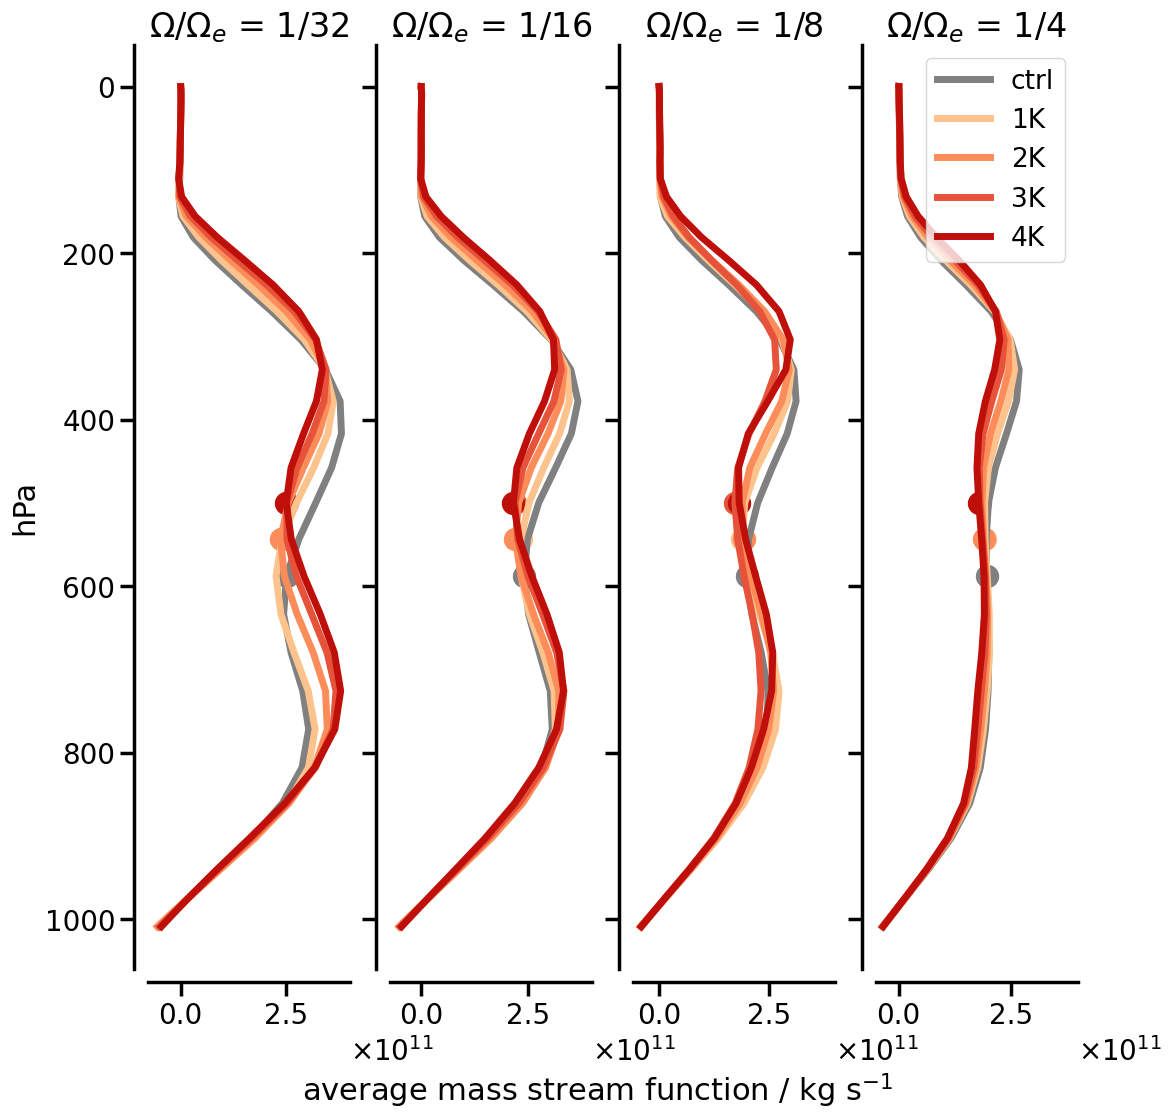

In [22]:
style=['solid','dotted']
xlabel = 'average mass stream function / kg s$^{-1}$'
x_lim=[None,4e11]

titles = [
        r'$\Omega/\Omega_e$ = 1/32', r'$\Omega/\Omega_e$ = 1/16', r'$\Omega/\Omega_e$ = 1/8', 
        r'$\Omega/\Omega_e$ = 1/4']


fig, axis = plt.subplots(nrows=1, ncols=4, figsize=(12, 12), sharey='row', sharex='col')
axis = axis.ravel()

for i, ax in enumerate(axis): 
    ax.spines[['right', 'top']].set_visible(False)
    ax.spines['left'].set_linewidth(2.5)
    ax.spines['bottom'].set_linewidth(2.5)
    ax.spines.left.set_position(('outward', 10))
    ax.spines.bottom.set_position(('outward', 10))
    
    
    for key, variant in mean_mastrfu.items():

        ax.plot(variant['mean mastrfu'][i],variant['mean mastrfu'][i].plev/100, color = variant['color'], 
                linewidth = 5, linestyle = 'solid',label = key)
         
        freeze_val = variant['mean mastrfu'][i].sel(plev = variant['freezing level'][i])
        p_freeze = freeze_val.plev/100
        
        ax.scatter(freeze_val,p_freeze, s = 250, marker ='o', color = variant['color'])
    
    if i == 0:
        ax.invert_yaxis()
        ax.set_ylabel('hPa', size=22)
    ax.set_title(titles[i], fontsize=24)
    ax.set_xlim(x_lim[0],x_lim[1])
    
    ax.xaxis.set_tick_params(which='major', labelsize=20, width=2.5, length=10)
    ax.yaxis.set_tick_params(which='major', labelsize=20, width=2.5, length=10)
    ax.xaxis.get_offset_text().set_visible(False)  # Hide the default offset text

    # Manually add the custom offset text
    ax.annotate(r'$\times 10^{11}$', xy=(1, 0), xytext=(0, -70),
            xycoords='axes fraction', textcoords='offset points',
            fontsize=20, ha='left', va='bottom')

plt.legend(fontsize=19)
fig.text(0.5, 0.0001, xlabel, ha='center', size=22)
plt.savefig('Figures/mean_mastrfu_ctrl_warm.pdf')

# Hadley cell extent

In [99]:
colormap = plt.cm.OrRd(np.linspace(0, 1, 7))
time_slice = slice(19860131.996528, 20151231.996528)

hadley_extent = {}

# Iterate over both data_ATM and data_mastrfu
for i, (key, data) in enumerate(data_MASTRFU.items()):
    
    mastrfu = dict_to_xarray(data, 'mastrfu', ('rotation', rotation), time_slice)

    mastrfu_north = mastrfu.mean(dim=['time', 'lon']).sel(lat=slice(90, 5))

    latitude = fun.hadley_cell_extent(mastrfu_north, 30000, 50000)

    # Determine color
    if key == 'ctrl':
        color = 'grey'
    else:
        color = colormap[i+1]

    # Store results
    hadley_extent[key] = {
        'latitude': latitude,
        'color': color
    }

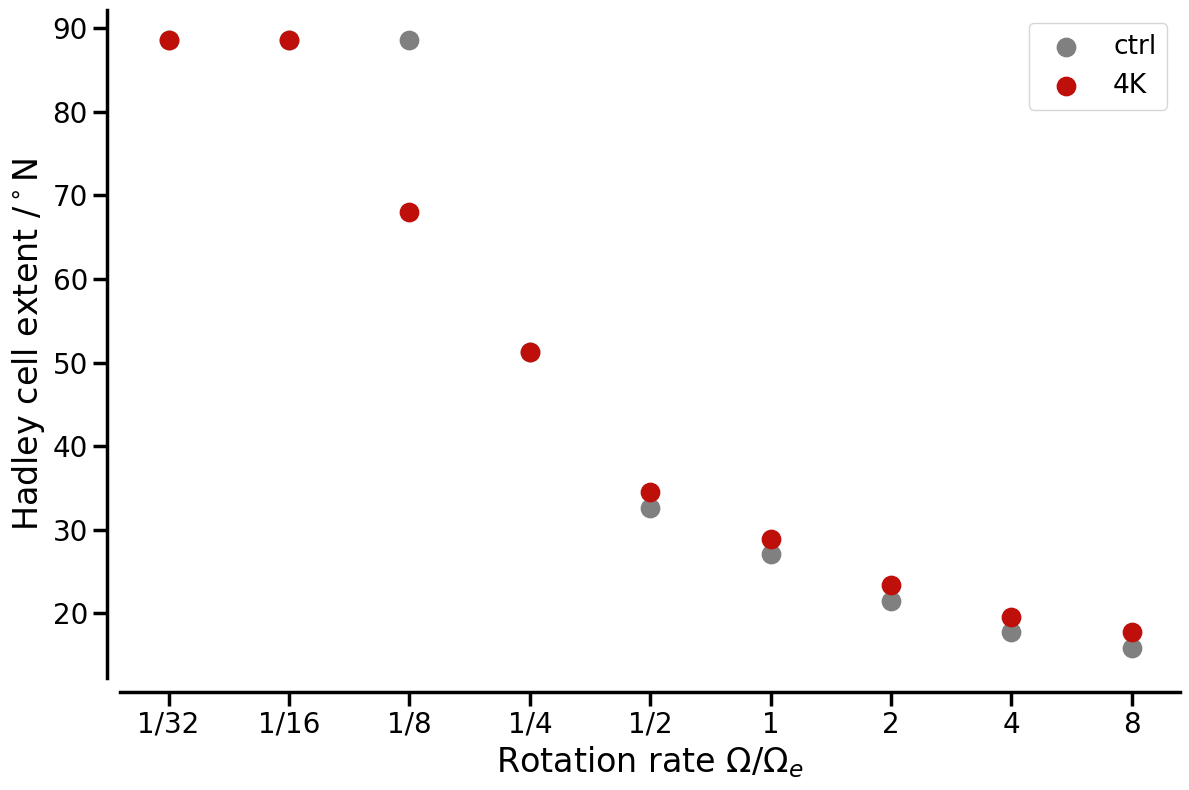

In [101]:
ylabel = 'Hadley cell extent /'r'$^\circ$N'
#y_lim=[-2e10, 3.5e10]


fig,ax = plt.subplots(figsize=(12,8))
ax.spines[['right', 'top']].set_visible(False)
ax.spines['left'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines.left.set_position(('outward', 10))
ax.spines.bottom.set_position(('outward', 10))
    
ticks = rotation #['1/32','1/16','1/8','1/4']
x = np.arange(0, len(ticks))

for key, var in hadley_extent.items():
    if key in ['ctrl','4K']:
        ax.scatter(x, hadley_extent[key]['latitude'], color = hadley_extent[key]['color'], label = key, 
                marker = 'o', s = 175)
        

ax.xaxis.set_tick_params(which='major', labelsize=20, width=2.5, length=10)
ax.yaxis.set_tick_params(which='major', labelsize=20, width=2.5, length=10)
ax.xaxis.set_ticks(x)
ax.set_xticklabels([x for x in ticks])
#ax.set_ylim(y_lim[0],y_lim[1])


plt.xlabel('Rotation rate '+ r'$\Omega/\Omega_{e}$', size=24)
plt.ylabel(ylabel, size=24)
plt.legend(fontsize=19)

plt.tight_layout()
plt.savefig('Figures/hadley_extent.pdf')

# Faster rotations

## Control scenario

In [19]:
path = '/work/mh0066/m300909/mpiesm-landveg/mpiesm-landveg-3D/experiments/'
sst = ''
ensemble = f'fixed_SST{sst}/'
setup = f'aquaplanet_Qobs_{sst}rotation_'
experiment = ['025x','05x', '1x', '2x', '4x' ,'8x']
output_dir = '/newdata/'
model = '_echam6'
file_type = '_mastrfu'
time = '_1976_2015'
suffix = '.nc'

file_name = [
    f"{setup}{exp}{model}{file_type}{time}{suffix}" for exp in experiment
]

In [20]:
ctrl_fast = {}

rotation = ['1/4','1/2', 'Earth-like', '2', '4', '8']

for i, rot in enumerate(rotation):
    ctrl_fast[rot] = xr.open_dataset(
        path + ensemble + setup + experiment[i] + output_dir + file_name[i],
        decode_times='true'
    )

## Warming scenario

### 1K

In [21]:
sst = '_1K'
ensemble = f'fixed_SST{sst}/'
setup = f'aquaplanet_Qobs{sst}_rotation_'

file_name = [
    f"{setup}{exp}{model}{file_type}{time}{suffix}" for exp in experiment
]

warm_1K_fast = {}

for i, rot in enumerate(rotation):
    warm_1K_fast[rot] = xr.open_dataset(
        path + ensemble + setup + experiment[i] + output_dir + file_name[i],
        decode_times='true'
    )

### 2K

In [22]:
sst = '_2K'
ensemble = f'fixed_SST{sst}/'
setup = f'aquaplanet_Qobs{sst}_rotation_'

file_name = [
    f"{setup}{exp}{model}{file_type}{time}{suffix}" for exp in experiment
]

warm_2K_fast = {}

for i, rot in enumerate(rotation):
    warm_2K_fast[rot] = xr.open_dataset(
        path + ensemble + setup + experiment[i] + output_dir + file_name[i],
        decode_times='true'
    )

### 3K

In [23]:
sst = '_3K'
ensemble = f'fixed_SST{sst}/'
setup = f'aquaplanet_Qobs{sst}_rotation_'


file_name = [
    f"{setup}{exp}{model}{file_type}{time}{suffix}" for exp in experiment
]

warm_3K_fast = {}

for i, rot in enumerate(rotation):
    warm_3K_fast[rot] = xr.open_dataset(
        path + ensemble + setup + experiment[i] + output_dir + file_name[i],
        decode_times='true'
    )

### 4K

In [24]:
sst = '_4K'
ensemble = f'fixed_SST{sst}/'
setup = f'aquaplanet_Qobs{sst}_rotation_'

file_name = [
    f"{setup}{exp}{model}{file_type}{time}{suffix}" for exp in experiment
]

warm_4K_fast = {}

for i, rot in enumerate(rotation):
    warm_4K_fast[rot] = xr.open_dataset(
        path + ensemble + setup + experiment[i] + output_dir + file_name[i],
        decode_times='true'
    )

In [25]:
data_mastrfu_fast = {
    'ctrl': ctrl_fast, 
    '1K': warm_1K_fast,
    '2K': warm_2K_fast,
    '3K': warm_3K_fast,
    '4K': warm_4K_fast
}

## Deep circulation

In [26]:
colormap = plt.cm.OrRd(np.linspace(0, 1, 7))
time_slice = slice(19860131.996528,20151231.996528)

deep_fast = {}


# Iterate over the data, skipping the 'ctrl' key
for i, (key, data) in enumerate(data_mastrfu_fast.items()):

    # Convert data to xarray
    mastrfu = dict_to_xarray(data, 'mastrfu', ('rotation', rotation) , time_slice)

    deep_mastrfu = fun.mean_mastrfu_profile(mastrfu)
    deep_mastrfu_max = fun.mean_mastrfu_max(deep_mastrfu)

    if key == 'ctrl':
        color = 'grey'
    else:
        color = colormap[i+1]

    deep_fast[key] = {'mastrfu': deep_mastrfu_max, 'color': color} 

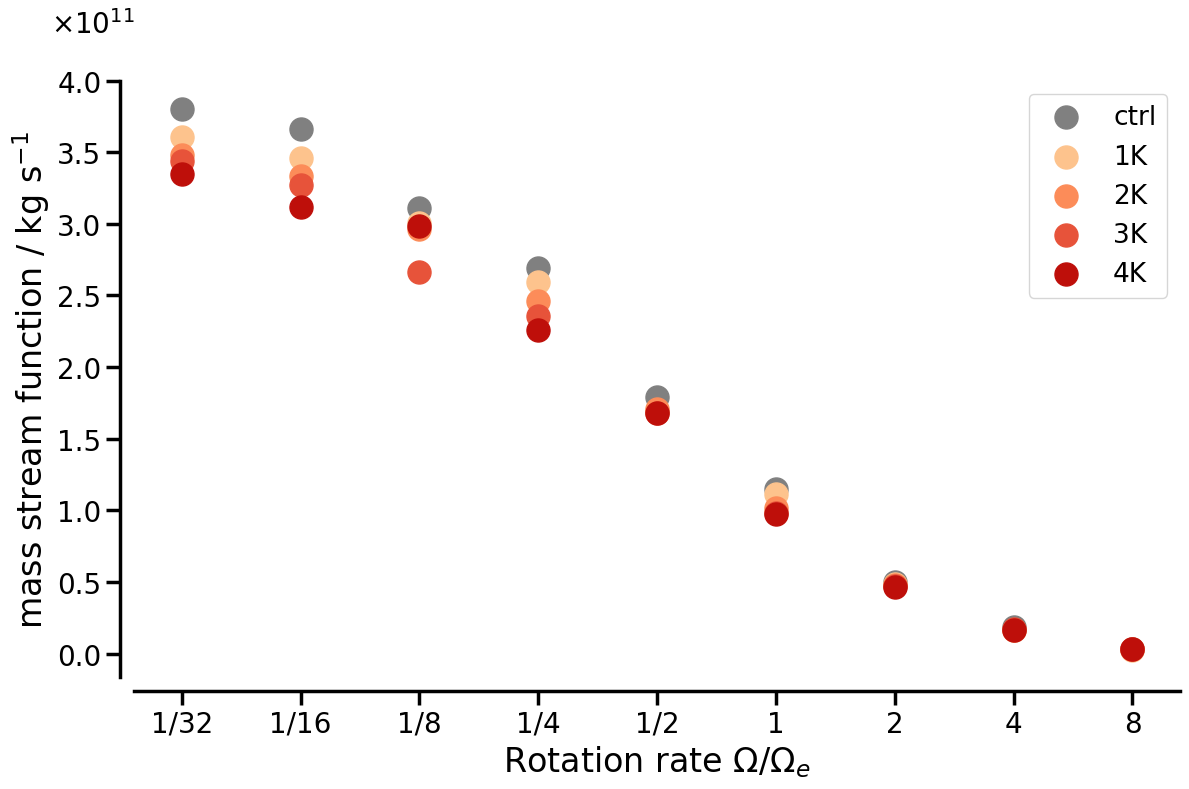

In [27]:
from matplotlib.ticker import ScalarFormatter
ylabel = 'mass stream function / kg s$^{-1}$'
y_lim = [None, 4e11]

fig,ax = plt.subplots(figsize=(12,8))
ax.spines[['right', 'top']].set_visible(False)
ax.spines['left'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines.left.set_position(('outward', 10))
ax.spines.bottom.set_position(('outward', 10))
    
ticks = ['1/32','1/16','1/8','1/4','1/2','1','2','4', '8']
x = np.arange(0, len(ticks))

for key, var in deep_fast.items():
    y = np.concatenate([deep[key]['mastrfu'].values, deep_fast[key]['mastrfu'].values]) 
    ax.scatter(x, y, color = deep_fast[key]['color'], label = key, 
            marker = 'o', s = 275)
    
#plt.yscale('log',base=10) 
ax.xaxis.set_tick_params(which='major', labelsize=20, width=2.5, length=10)
ax.yaxis.set_tick_params(which='major', labelsize=20, width=2.5, length=10)
ax.xaxis.set_ticks(x)
ax.set_xticklabels([x for x in ticks])
ax.set_ylim(y_lim[0],y_lim[1])

ax.yaxis.get_offset_text().set_visible(False)  # Hide the default offset text

# Manually add the custom offset text
ax.annotate(r'$\times 10^{11}$', xy=(0, 1), xytext=(-60, 30),
            xycoords='axes fraction', textcoords='offset points',
            fontsize=20, ha='left', va='bottom')


plt.xlabel('Rotation rate '+ r'$\Omega/\Omega_{e}$', size=24)
plt.ylabel(ylabel, size=24)
plt.legend(fontsize=19)
#plt.axhline(y=0, color='k', linewidth=1, linestyle = 'dotted')

plt.tight_layout()
plt.savefig('Figures/deep_changes.pdf')

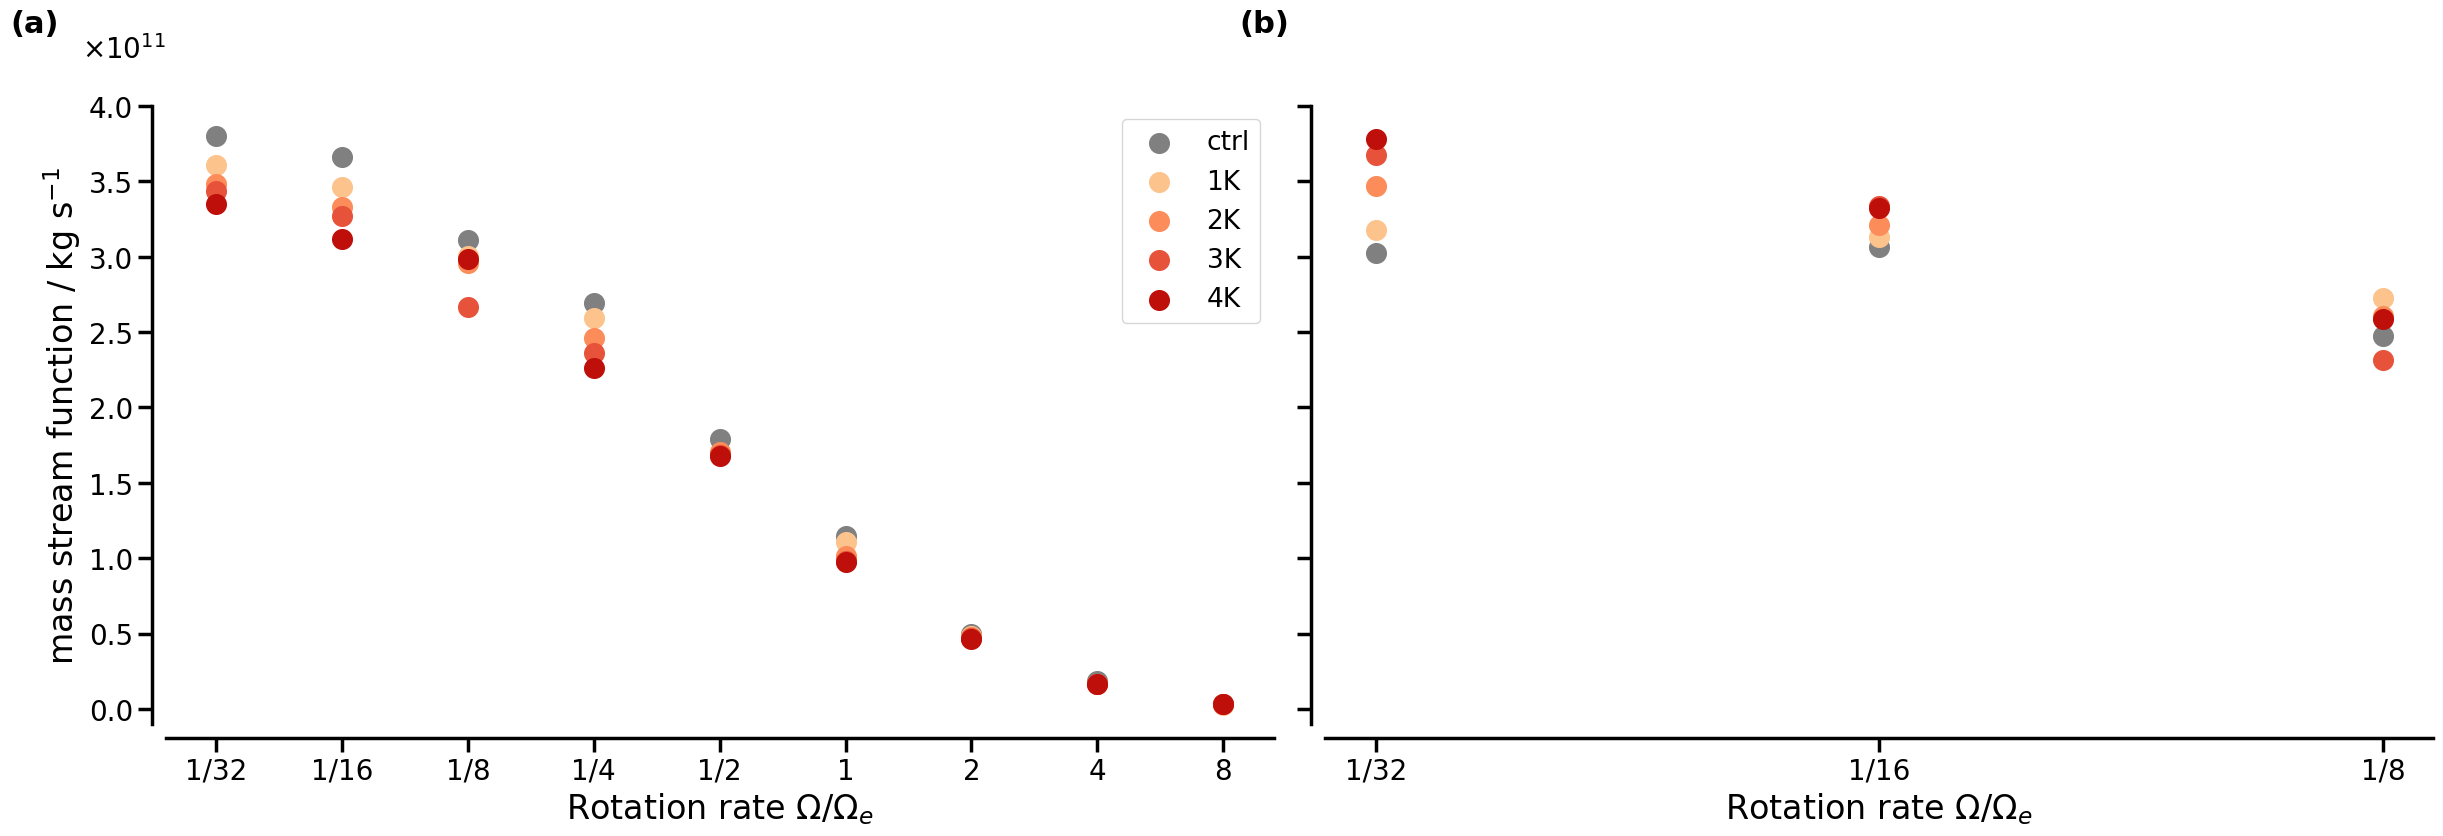

In [72]:
import numpy as np
import matplotlib.pyplot as plt

ylabel = r'mass stream function / kg s$^{-1}$'
y_lim = (-0.1e11, 4e11)

fig, (ax_left, ax_right) = plt.subplots(
    1, 2, figsize=(24, 8), sharey=True, constrained_layout=True
)
fig.set_constrained_layout_pads(w_pad=0.05, h_pad=0.05, wspace=0.02, hspace=0.02)


# ---------- Left subplot: deep + deep_fast ----------
ax_left.spines[['right', 'top']].set_visible(False)
ax_left.spines['left'].set_linewidth(2.5)
ax_left.spines['bottom'].set_linewidth(2.5)
ax_left.spines.left.set_position(('outward', 10))
ax_left.spines.bottom.set_position(('outward', 10))

ticks2 = ['1/32', '1/16', '1/8', '1/4', '1/2', '1', '2', '4', '8']
x2 = np.arange(len(ticks2))

for key, var in deep_fast.items():
    y = np.concatenate([deep[key]['mastrfu'].values, deep_fast[key]['mastrfu'].values])
    ax_left.scatter(x2, y, color=deep_fast[key]['color'], label=key, marker='o', s=200)

ax_left.xaxis.set_tick_params(which='major', labelsize=20, width=2.5, length=10)
ax_left.yaxis.set_tick_params(which='major', labelsize=20, width=2.5, length=10)
ax_left.set_xticks(x2)
ax_left.set_xticklabels(ticks2)
ax_left.set_ylim(*y_lim)  # shared y-limits applied here

ax_left.yaxis.get_offset_text().set_visible(False)
ax_left.annotate(r'$\times 10^{11}$', xy=(0, 1), xytext=(-60, 30),
                 xycoords='axes fraction', textcoords='offset points',
                 fontsize=20, ha='left', va='bottom')

ax_left.set_xlabel('Rotation rate ' + r'$\Omega/\Omega_{e}$', size=24)
ax_left.set_ylabel(ylabel, size=24)
ax_left.legend(fontsize=19)

# ---------- Right subplot: congestus ----------
ax_right.spines[['right', 'top']].set_visible(False)
ax_right.spines['left'].set_linewidth(2.5)
ax_right.spines['bottom'].set_linewidth(2.5)
ax_right.spines.left.set_position(('outward', 10))
ax_right.spines.bottom.set_position(('outward', 10))

ticks1 = ['1/32', '1/16', '1/8']
x1 = np.arange(len(ticks1))


for key, var in congestus.items():
    ax_right.scatter(x1, congestus[key]['mastrfu'],
                     color=congestus[key]['color'], label=key, marker='o', s=200)

ax_right.xaxis.set_tick_params(which='major', labelsize=20, width=2.5, length=10)
ax_right.yaxis.set_tick_params(which='major', labelsize=20, width=2.5, length=10)
ax_right.set_xticks(x1)
ax_right.set_xticklabels(ticks1)

#ax_right.yaxis.get_offset_text().set_visible(False)
#ax_right.annotate(r'$\times 10^{11}$', xy=(0, 1), xytext=(-60, 30),
#                  xycoords='axes fraction', textcoords='offset points',
#                  fontsize=20, ha='left', va='bottom')

ax_right.set_xlabel('Rotation rate ' + r'$\Omega/\Omega_{e}$', size=24)
#ax_right.set_ylabel(ylabel, size=24)
#ax_right.legend(fontsize=19, loc='lower center')

fig.canvas.draw()

b1 = ax_left.get_position()
b2 = ax_right.get_position()

off_x = 0.045   # move further left by increasing this
off_y = 0.2   # vertical gap above the axes

x_a = max(0.0001, b1.x0 - off_x)
x_b = max(0.0001, b2.x0 - (off_x-0.03))
y_a = min(0.99, b1.y1 + off_y)
y_b = min(0.99, b2.y1 + off_y)

fig.text(x_a, y_a, '(a)', ha='right', va='bottom', fontsize=22, fontweight='bold')
fig.text(x_b, y_b, '(b)', ha='right', va='bottom', fontsize=22, fontweight='bold')

plt.savefig('Figures/deep_congestus_changes.pdf',dpi=300, bbox_inches='tight', pad_inches=0.25)